# Determining Dynamical Mass of Protostars
We need to determine our values for the Keplerian rotation formula represented by: 

v^2 = GM/r.

Where v is velocity of the system, G is the gravitational constant, M is the mass of the protostar, and r is the radius from the center of the star to the edge of the disk.

In order to find v we need to apply the Doppler shift formula of 

(λ-λ0)/λ0 = v/c

Where λ is the observed wavelength, λ0 is actual wavelength, v is velocity, and c is the speed of light.

## Finding our values
We can find our values from certain archived data from ALMA and also from researcher's papers on each protostar that has been observed.

The archived data provides us with .fits files that we can open and observe with SAO/DS9 to find the wavelength we want and the range of radii we will be observing.

When using these fits files, we look at each slice and find the one where we can see the protostar and also the farthest a disk can get while making sure it is not an outflow jet as this can change the radius enough to give a wrong final mass even if the difference is off by 1 pixel.

## Objects
So that we can have more objects to compare to, we can have multiple objects using the same equation and the changes done to the code would be the frequencies used and the radii we want for the object.

In [1]:
#Import our packages so that we can do stuff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Setting base values
We set our base values here to convert frequency into wavelength for the Doppler formula

In [2]:
#The slides are given in frequency. In order to change this, we have to convert the frequency to wavelength and then continue.
c = 299792.458 #m/s #speed of light
f_B335 = 2.19554e+11 #Hz
f_L328 = 2.19557157534e+11
f_BHR71 = 2.19564e+11
#L1527 is given in v_rad

### Wavelength values
Now we get to set our wavelength for observed and for real wavelength. By doing this we can then find the velocity of the system.

In [3]:
lmd_B335 = c/f_B335 #convert to wavelength
lmd_L328 = c/f_L328
lmd_BHR71 = c/f_BHR71
lmd0_B335 = 2.19555e+11 #the center should be most apparent around the middle of the set of frequencies I chose
lmd0_L328 = 2.19555924657e+11
lmd0_BHR71 = 2.19565e+11
v_B335 = abs(((lmd_B335-lmd0_B335)/(lmd0_B335))*c) #use Doppler Shift formula
v_L328 = abs(((lmd_L328-lmd0_L328)/(lmd0_L328))*c)
v_BHR71 = abs(((lmd_BHR71-lmd0_BHR71)/(lmd0_BHR71))*c)
v_L1527 = 299792.458
print (v_L328,v_B335,v_BHR71)

299792.458 299792.458 299792.458


### Pixel data
We take our pixel data that we determine where the brightest point is to say that is the center of the protostar. The disk pixel data is where we assume is the farthest point of interest for where the disk is while taking care to make sure it's not an outflow jet.

In [4]:
#The numbers were achieved by finding amount of pixels between the center of the protostar and the edge of the disk
ps_pix_B335 = [355,348] #pixel location of the star's center
ps_pix_L1527 = [185,178]
ps_pix_L328 = [347,348]
ps_pix_BHR71 = [203,223]
diskx_B335 = 358 #x value of where the disk edge may be
disky_B335 = 330 #y value of where the disk edge may be
diskx_L1527 = 183
disky_L1527 = 196
diskx_L328 = 344
disky_L328 = 339 
diskx_BHR71 = 225
disky_BHR71 = 231

### Radius of the disk
We have to use the pixel data and convert it into astronomical units (1 AU is distance from Earth to Sun).

In [5]:
r_pix_B335 = (((disky_B335-348)**2)+((diskx_B335-355)**2))**0.5 #distance formula
r_pix_L1527 = (((disky_L1527-178)**2)+((diskx_L1527-185)**2))**0.5
r_pix_L328 = (((disky_L328-348)**2)+((diskx_L328-347)**2))**0.5
r_pix_BHR71 = (((disky_BHR71-223)**2)+((diskx_BHR71-203)**2))**0.5
rarcsec_B335 = 0.1*r_pix_B335 #in the data file, the cell value scale has to be multipled by 0.1
rarcsec_L1527 = 0.17*r_pix_L1527
rarcsec_L328 = 0.075*r_pix_L328
rarcsec_BHR71 = 0.2*r_pix_L328
rAU_B335 = rarcsec_B335*250 #from the B335 document, the distance between Earth and this star is 250Pc
rAU_L1527 = rarcsec_L1527*140
rAU_L328 = rarcsec_L328*217
rAU_BHR71 = rarcsec_BHR71*175
print (rAU_L328, rAU_B335,rAU_L1527,rAU_BHR71) #potential radius

154.39820675772114 456.2071897723665 431.0363325753411 332.03915431767985


### Velocity and radius in Pc
Convert the velocity appropriate factor of m/s while also squaring it so that it can line up with the Keplerian formula. Also convert the AU we found previously into Parsecs as it works with our equation. 

In [6]:
vf_B335 = (v_B335/1000)**2 #convert and square it
vf_L328 = (v_L328/1000)**2
vf_L1527 = (v_L1527/1000)**2
vf_BHR71 = (v_BHR71/1000)**2
r_Pc_B335 = rAU_B335*1.496e+11 #convert AU to parsec
r_Pc_L328 = rAU_L328*1.496e+11
r_Pc_L1527 = rAU_L1527*1.496e+11
r_Pc_BHR71 = rAU_BHR71*1.496e+11

In [7]:
G = 6.67408e-11 #m^3 kg^-1 s^-2 #Gravitational constant
M_B335 = (r_Pc_B335*vf_B335)/G
M_L328 = (r_Pc_L328*vf_L328)/G
M_L1527 = (r_Pc_L1527*vf_L1527)/G
M_BHR71 = (r_Pc_BHR71*vf_BHR71)/G
print (M_B335,M_L328,M_L1527,M_BHR71)

9.190596865482395e+28 3.110454431399159e+28 8.683513227953761e+28 6.689149314836901e+28


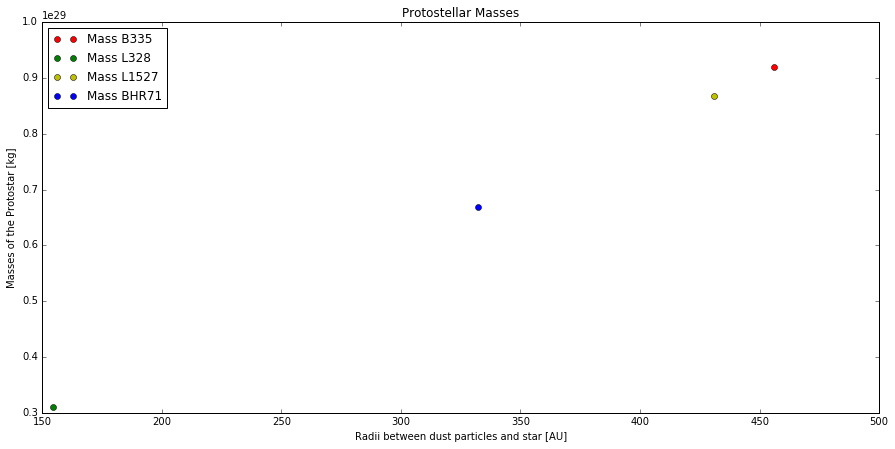

In [8]:
plt.figure(figsize = (15,7))
plt.plot(rAU_B335,M_B335,'ro',label='Mass B335')
plt.plot(rAU_L328,M_L328,'go',label='Mass L328')
plt.plot(rAU_L1527,M_L1527,'yo',label='Mass L1527')
plt.plot(rAU_BHR71,M_BHR71,'bo',label='Mass BHR71')
plt.ylabel('Masses of the Protostar [kg]') #y-axis label
plt.xlabel('Radii between dust particles and star [AU]') #x-axis label
plt.title('Protostellar Masses') #title
plt.legend(loc='best')
plt.show()

## Conclusion
After plotting 4 different protostars, we can start seeing a trend in that protostars seem to form mass in a near linear trend. This can mean a few things but more importantly is that the mass accumulation of protostars over time seems to be linear. This may only apply to Class I protostars only as that was the only focus of my research. This can also help accurately predict what type of star a protostar could be after they finish forming well before it finishes.